In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

### Se importan los datos

(60000, 28, 28) (60000,)


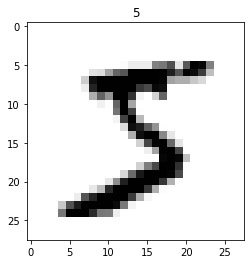

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Imprime los tamanios de la matriz, y_train.shape() devuelve una sola componente pues son los resultados. 
print(X_train.shape, y_train.shape)
plt.title(y_train[0])
plt.imshow(X_train[0], cmap= 'binary')

### Preprocesamiento de datos 

In [3]:
#Se expande la dimension de las matrices para que el algoritmo pueda trabajar con ellas
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

#Se normalizan las imagenes RBG diviendo entre 255
X_train = X_train/255.0 
X_test = X_test/255.0 

In [4]:
#Se convierten los vectores de resultados a matrices categoricas
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

### Modelo

In [5]:
batch_size = 100
num_classes = 10
epochs = 50

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

#Fully connected output layer 
model.add(Dense(num_classes, activation='softmax'))

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [7]:
#Callbacks para monitorear overfitting
from keras import callbacks

es = callbacks.EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 4, verbose= 1)

mc = callbacks.ModelCheckpoint("./mnist.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True)

cb = [es, mc]

In [8]:
hist = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split= 0.3, callbacks= cb)
print("The model has successfully trained")

Epoch 1/50
419/420 [============================>.] - ETA: 0s - loss: 2.4637 - accuracy: 0.1079
Epoch 1: val_accuracy improved from -inf to 0.17217, saving model to .\mnist.h5
420/420 [==============================] - 16s 37ms/step - loss: 2.4633 - accuracy: 0.1079 - val_loss: 2.2550 - val_accuracy: 0.1722
Epoch 2/50
419/420 [============================>.] - ETA: 0s - loss: 2.1292 - accuracy: 0.2591
Epoch 2: val_accuracy improved from 0.17217 to 0.35594, saving model to .\mnist.h5
420/420 [==============================] - 15s 35ms/step - loss: 2.1290 - accuracy: 0.2590 - val_loss: 2.0044 - val_accuracy: 0.3559
Epoch 3/50
419/420 [============================>.] - ETA: 0s - loss: 1.9043 - accuracy: 0.4311
Epoch 3: val_accuracy improved from 0.35594 to 0.49761, saving model to .\mnist.h5
420/420 [==============================] - 15s 36ms/step - loss: 1.9041 - accuracy: 0.4312 - val_loss: 1.7925 - val_accuracy: 0.4976
Epoch 4/50
419/420 [============================>.] - ETA: 0s - los

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30992984771728516
Test accuracy: 0.9164999723434448
